In [ ]:
# Projeto Final da disciplina Sistemas Baseados em Conhecimento 
# Corretor automático de redações do ENEM

In [ ]:
pip install git+https://github.com/gpassero/uol-redacoes-xml.git

  Cloning https://github.com/gpassero/uol-redacoes-xml.git to /tmp/pip-req-build-mmhx50dr
  Running command git clone --filter=blob:none --quiet https://github.com/gpassero/uol-redacoes-xml.git /tmp/pip-req-build-mmhx50dr
  Resolved https://github.com/gpassero/uol-redacoes-xml.git to commit 94b74fc91c4e7a6b582ebc3708aa0dca2ba12ca6
  Preparing metadata (setup.py) ... done
  Created wheel for uol_redacoes_xml: filename=uol_redacoes_xml-0.2-py3-none-any.whl size=2978835 sha256=d5031f342f7ad3ece8ac79d0ae9687959b677d4f61302ff2e77e9bc39d5bbd24
  Stored in directory: /tmp/pip-ephem-wheel-cache-k1vhns8_/wheels/d4/cf/32/0529a0b02e73b4ed766e7f0798f21fd4fd01f3f2fbe6bc6d50
Successfully built uol_redacoes_xml


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import requests
import re
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

import uol_redacoes_xml
essays = uol_redacoes_xml.load()

print(len(essays))
# ~2000
print(essays[0].text)
# texto original da primeira redação
print([attr for attr in essays[0].__dir__() if not attr.startswith('_')])
# exibe os atributos do objeto de redação (exceto os privados, que começam com '_')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2164
A liberdade de expressão, assim como o direito à intimidade são conquistas históricas. Quando um entra em contato com o outro, é preciso pesar com bom senso os dois lados.
Em épocas de regimes autoritários como as ditaduras militares na América Latina e fascistas na Europa, a imprensa não tinha liberdade para veicular notícias diversas, esbarrando comumente na censura. Nessas épocas, as pessoas também sofriam graves violações em suas vidas privadas por meio de tortura e constrangimentos, por exemplo, mas com a ascenção da democracia no ocidente , esses direitos foram amplamente protegidos por lei.
Porém, há casos em que essas garantias são postas em conflito, como em que figuras públicas, principalmente políticas, são pauta de notícias que esbarram em sua intimidade. Assim, o alvo dessas matérias, pode requerer sigilo por se tratar da sua vida privada enquanto a imprensa vê cerceada sua liberdade de expressão.
Portanto, é preciso avaliar até onde o direito de expressão pode ser ab

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('portuguese'))

def preprocess_text(text):
  # remove pontuações e caracteres especiais
  text = text.translate(str.maketrans('', '', string.punctuation))

  # remove números
  text = re.sub(r'\d+', '', text)

  # tokeniza
  tokens = word_tokenize(text.lower())

  # remove stopwords e aplica a lematização
  processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return " ".join(processed_tokens)

# aplica pré-processamento em todas as redações
processed_essays = [preprocess_text(essay.text) for essay in essays]

In [ ]:
from nltk import pos_tag

# função para contar o número de caracteres
def count_characters(text):
  return len(text)

# função para contar o número de palavras
def count_words(processed_text):
  return len(processed_text.split())

# função para contar o número de parágrafos
def count_paragraphs(text):
  return text.count('\n') + 1

# função para calcular o tamanho médio dos parágrafos
def average_paragraph_length(num_words, num_paragraphs):
  return num_words/num_paragraphs if num_paragraphs > 0 else 0

# função para contar o número de palavras únicas
def count_unique_words(processed_text):
  return len(set(processed_text.split()))

# função para calcular a repetição de palavras
def calculate_word_repetition(num_words, unique_words):
  return num_words/unique_words if unique_words > 0 else 0

# função para cacular o tamanho médio das palavras
def average_word_length(processed_text):
  words = processed_text.split()
  return np.mean([len(word) for word in words]) if words else 0

# função para calcular a média de palavras por sentença
def average_words_per_sentence(text):
  sentences = sent_tokenize(text)
  return np.mean([len(word_tokenize(sent)) for sent in sentences]) if sentences else 0

# função para calcular o índice de diversidade lexical (TTR)
def lexical_diversity(text):
  tokens = word_tokenize(text)
  unique_tokens = set(tokens)
  return len(unique_tokens) / len(tokens) if tokens else 0

# função para calcular erros ortográficos
def count_errors(essay_errors):
  return len(essay_errors)

# lista de conectivos
connectives = ['e', 'mas', 'ou', 'porém', 'embora', 'entretanto', 'portanto', 'contudo', 'igualmente', 'da mesma forma',
               'assim também', 'do mesmo modo', 'semelhantemente','de acordo com', 'segundo','enfim', 'logo', 'primeiramente',
               'frequentemente', 'ademais', 'além disso', 'dessa maneira', 'consequentemente', 'em suma', 'por exemplo',
               'com o fim de', 'em resumo', 'por conseguinte', 'em virtude de', 'pois', 'no entanto', 'apesar de', 'em contrapartida']

# função para contar conectivos
def count_connectives(text):
    tokens = word_tokenize(text.lower())
    connective_count = sum(1 for token in tokens if token.lower() in connectives)
    return connective_count

# função para contar pronomes de 1ª pessoa
def count_first_person_pronouns(text):
    # lista de pronomes de primeira pessoa
    first_person_pronouns = [ "eu", "meu", "minha", "meus", "minhas",
                              "nós", "nosso", "nossa", "nossos", "nossas"]
    return sum(text.count(pronoun) for pronoun in first_person_pronouns)

In [ ]:
# função para extrair as features
def extract_features(essays):
    features = []
    targets = []

    # vetorizador para bi-gramas e tri-gramas
    vectorizer = CountVectorizer(ngram_range=(2, 3), max_features=500)
    all_texts = [preprocess_text(essay.text) for essay in essays]
    ngram_features = vectorizer.fit_transform(all_texts).toarray()

    for i, essay in enumerate(essays):
        processed_text = preprocess_text(essay.text)

        # extraindo características
        num_characters = count_characters(essay.text)                              # número de caracteres
        num_words = count_words(processed_text)                                    # número de palavras
        num_paragraphs = count_paragraphs(essay.text)                              # número de parágrafos
        avg_paragraph_length = average_paragraph_length(num_words, num_paragraphs) # tamanho médio dos parágrafos
        unique_words = count_unique_words(processed_text)                          # número de palavras únicas
        word_repetition = calculate_word_repetition(num_words, unique_words)       # número de repetições de palavras
        avg_word_length = average_word_length(processed_text)                      # tamanho médio das palavras

        avg_words_per_sentence = average_words_per_sentence(essay.text)            # média de palavras por sentença
        lexical_div = lexical_diversity(processed_text)                            # diversidade léxica
        spelling_errors = count_errors(essay.errors)                               # número de erros


        connective_count = count_connectives(essay.text)                           # número de conectivos
        first_person_count = count_first_person_pronouns(processed_text)           # número de pronomes em 1ª pessoa


        # combinação das características
        features.append([
            num_characters, num_words, num_paragraphs, avg_paragraph_length, unique_words,
            word_repetition, avg_word_length, avg_words_per_sentence, lexical_div, spelling_errors,
            connective_count, first_person_count
        ])

        # adiciona a nota final como alvo
        targets.append(essay.final_score)

    return np.array(features), np.array(targets)    # retorna uma tupla com o array de features e o array de targets (valores de saída)

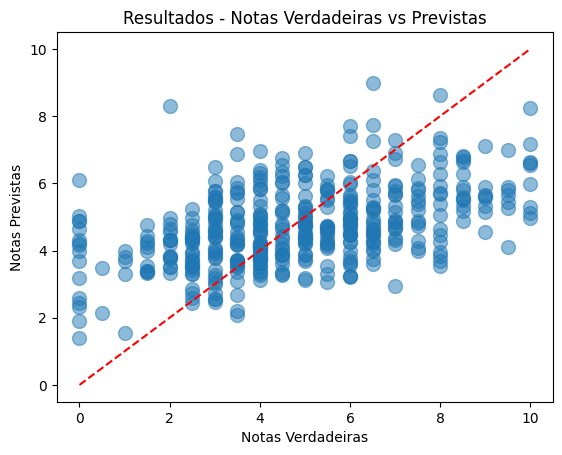

RMSE: 2.03
Correlação de Pearson: 0.48


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import string

# extrai features e alvos
X_final, y_final = extract_features(essays)

# divide em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# treina o modelo
model_final = LinearRegression()
model_final.fit(X_train, y_train)

# faz previsões
y_pred_final = model_final.predict(X_test)

# avalia o desempenho
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
pearson_corr, _ = pearsonr(y_test, y_pred_final)     # calcula a correlação de Pearson

# gráfico de dispersão
plt.scatter(y_test, y_pred_final, alpha=0.5, s = 100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Notas Verdadeiras')
plt.ylabel('Notas Previstas')
plt.title('Resultados - Notas Verdadeiras vs Previstas')
plt.show()

# printa os valores
print(f"RMSE: {rmse_final:.2f}")
print(f"Correlação de Pearson: {pearson_corr:.2f}")

In [ ]:
# valores originais
# Modelo      Pearson	  RMSE
# Baseline    0.42      2.04